# Add 10% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils, sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_clean = df.copy()

## Age

In [2]:
df = df_clean.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')


--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 10)

Outliers found:


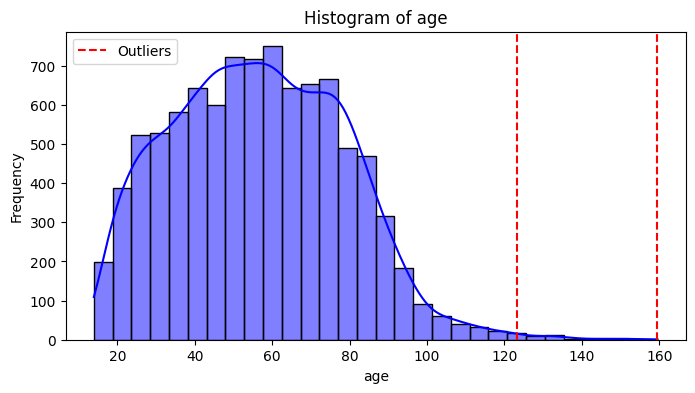

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1434
           1       0.87      0.90      0.88      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809

Node Labels:
 Annotation(0.596196, 0.954545, 'avg_glucose_level <= 167.285\nsamples = 6554\nvalue = [3280, 3274]\nclass = 0')


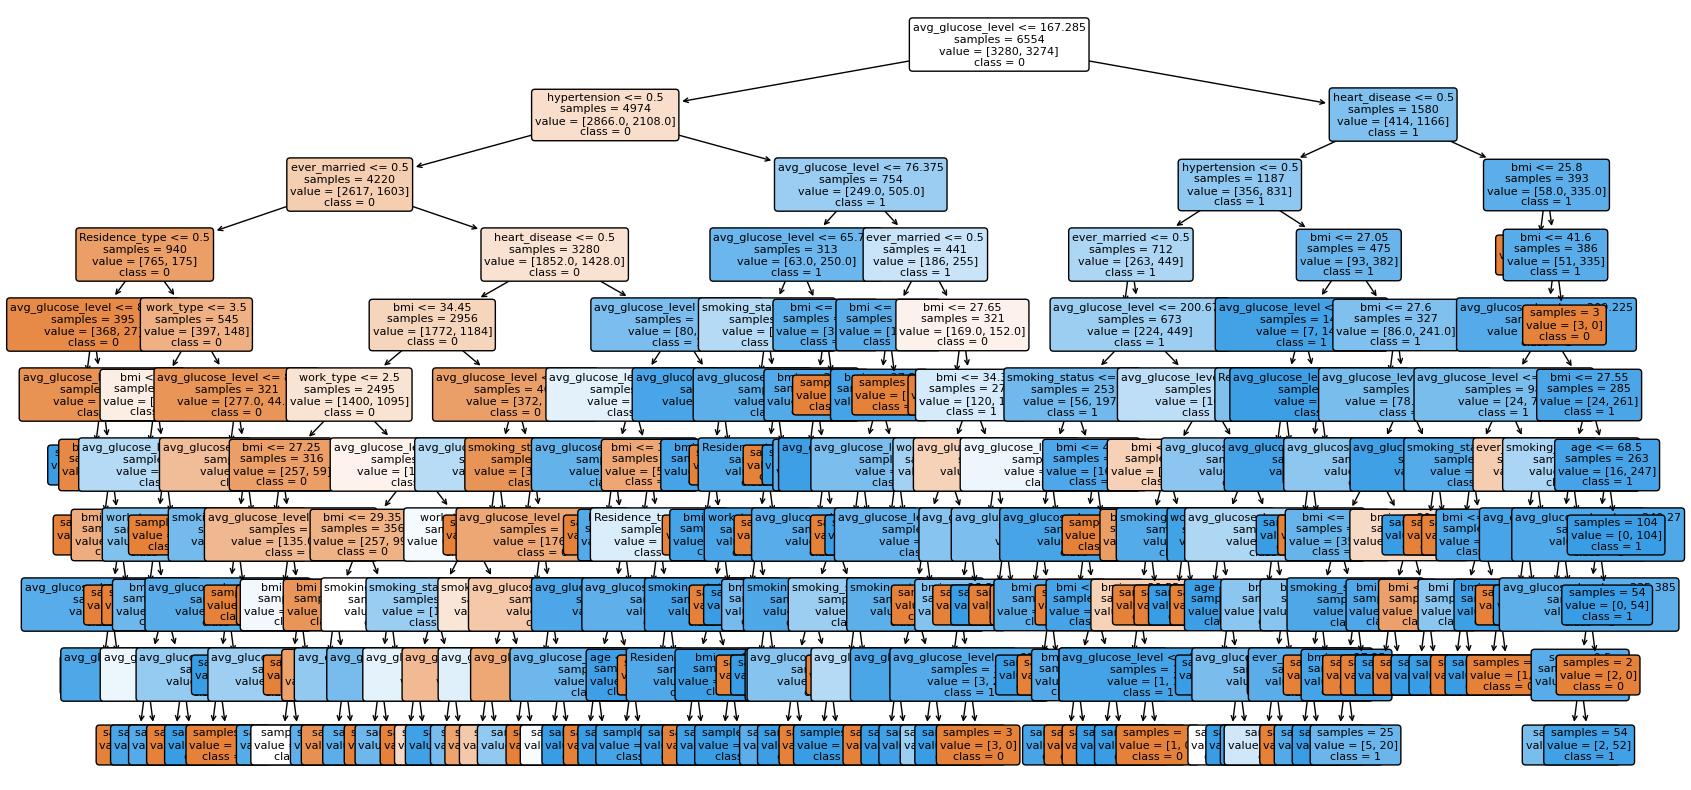

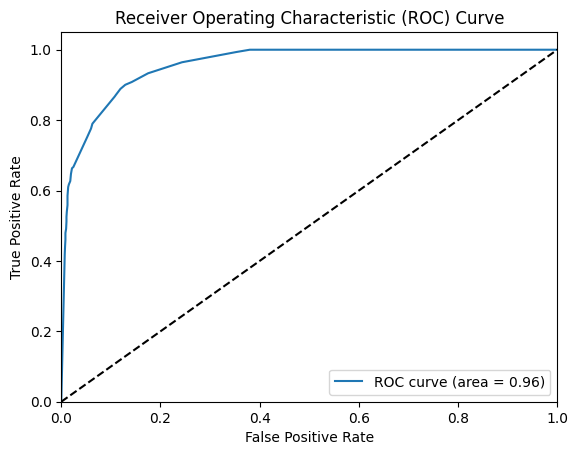

AUC Score: 0.9569336883479143


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8505338078291815, 0.8434163701067615, 0.8469750889679716, 0.8291814946619217, 0.8078291814946619, 0.7615658362989324, 0.8647686832740213, 0.7758007117437722, 0.7651245551601423, 0.8071428571428572]
Mean accuracy: 0.8152338586680223
95% confidence interval: (0.788295557943673, 0.8421721593923717)


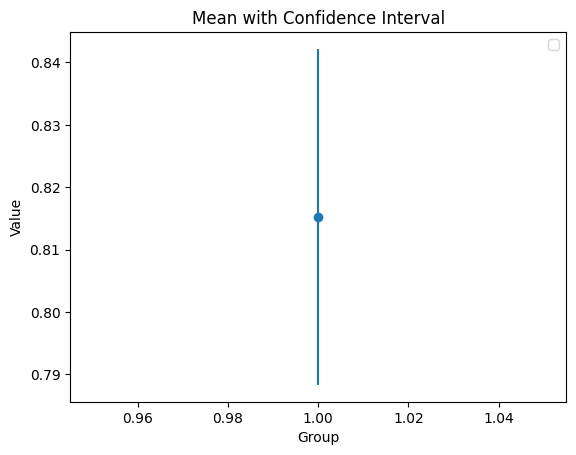

In [6]:
y_pred_prob_age_dt, y_test_age_dt, decision_tree = ML_algorithms.model_dt(df_age, df_clean)
mean_accuracy_dt_age, confidence_interval_dt_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)


**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1434
           1       0.89      0.94      0.91      1375

    accuracy                           0.91      2809
   macro avg       0.91      0.91      0.91      2809
weighted avg       0.91      0.91      0.91      2809



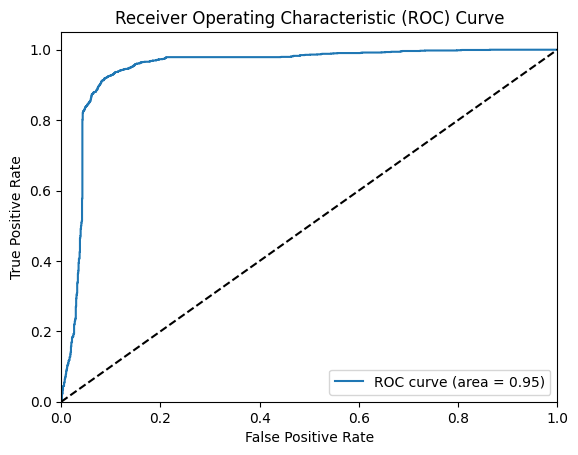

AUC Score: 0.9467726638772662


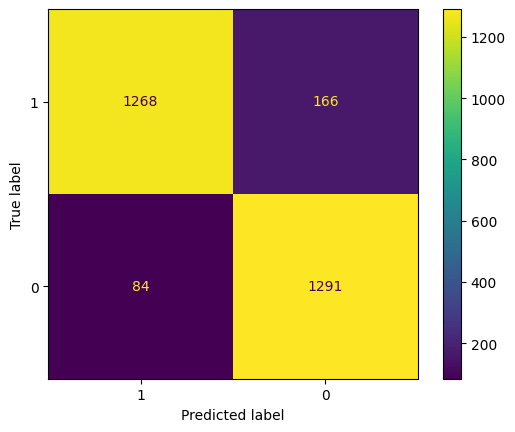

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy for each fold: [0.800711743772242, 0.7758007117437722, 0.7651245551601423, 0.7758007117437722, 0.7615658362989324, 0.7615658362989324, 0.7722419928825622, 0.7508896797153025, 0.7935943060498221, 0.7857142857142857]
Mean accuracy: 0.7743009659379767
95% confidence interval: (0.7632047942161256, 0.7853971376598278)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [7]:
y_pred_prob_age_svm, y_test_age_svm, svm = ML_algorithms.model_svm(df_age, df_clean)
mean_accuracy_svm_age, confidence_interval_svm_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_age, 'age')

Outliers found:


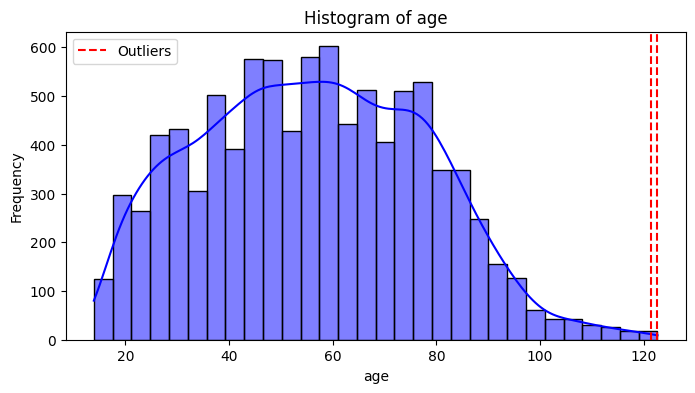

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1434
           1       0.87      0.90      0.88      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809

Node Labels:
 Annotation(0.596196, 0.954545, 'avg_glucose_level <= 167.285\nsamples = 6554\nvalue = [3280, 3274]\nclass = 0')


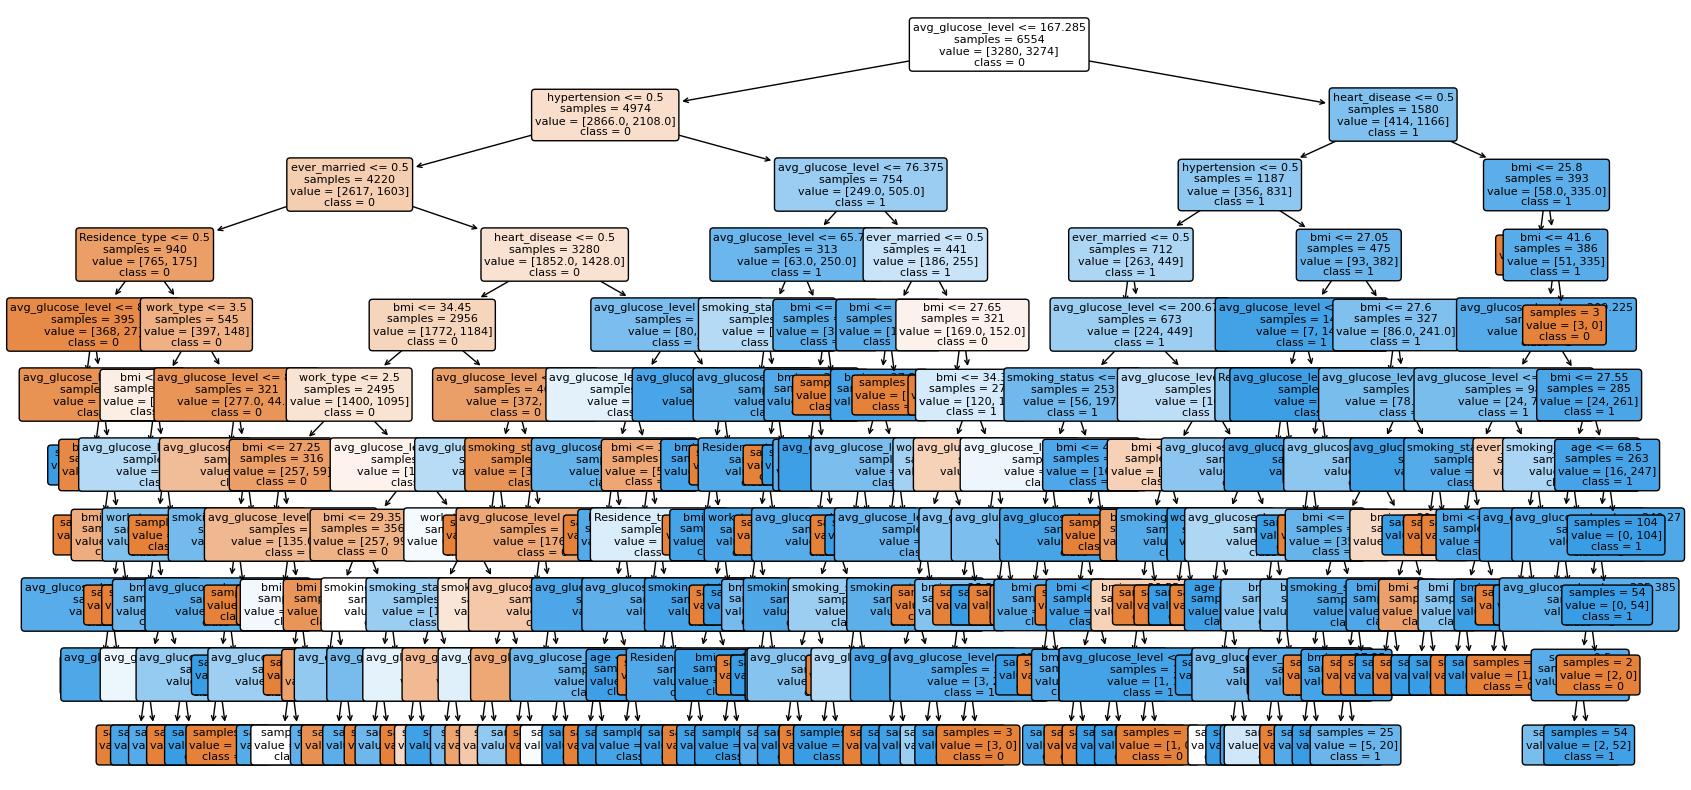

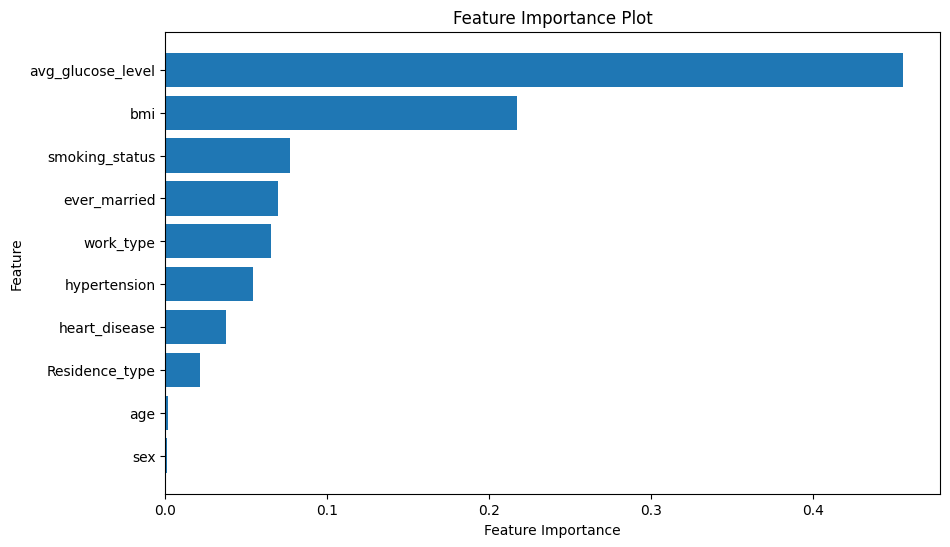

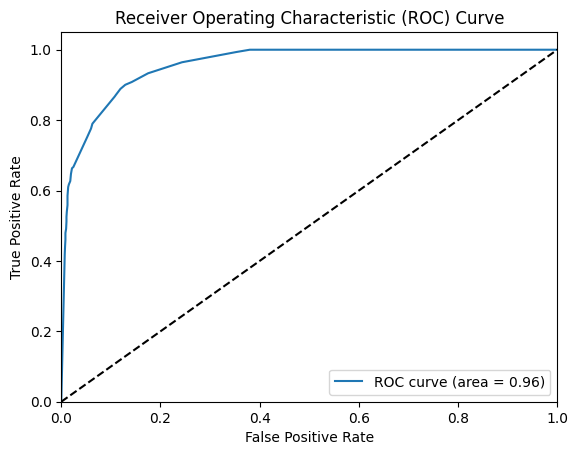

AUC Score: 0.9569336883479143


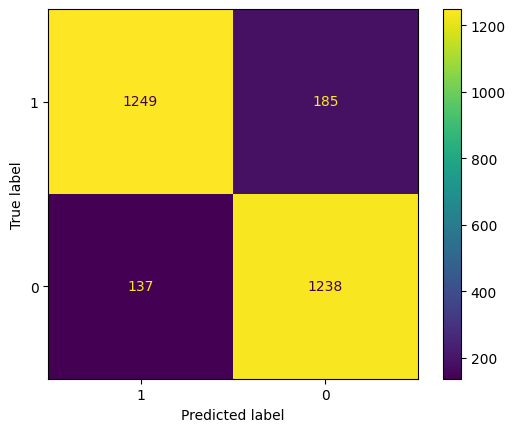

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8256227758007118, 0.7935943060498221, 0.8078291814946619, 0.8576512455516014, 0.8362989323843416, 0.8042704626334519, 0.7722419928825622, 0.8434163701067615, 0.8362989323843416, 0.7678571428571429]
Mean accuracy: 0.8145081342145399
95% confidence interval: (0.7927582313813558, 0.8362580370477241)


In [10]:
y_prob_dt_20_age, y_test_dt_20_age, decision_tree = ML_algorithms.model_dt(df_mean_age, df_clean)
mean_accuracy_dt_20_age, confidence_interval_dt_20_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1434
           1       0.89      0.94      0.91      1375

    accuracy                           0.91      2809
   macro avg       0.91      0.91      0.91      2809
weighted avg       0.91      0.91      0.91      2809



AUC Score: 0.9460448839863066


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.7651245551601423, 0.797153024911032, 0.7686832740213523, 0.7793594306049823, 0.7651245551601423, 0.8256227758007118, 0.7508896797153025, 0.7508896797153025, 0.7714285714285715]
Mean accuracy: 0.7774987290289781
95% confidence interval: (0.7605009030596328, 0.7944965549983234)


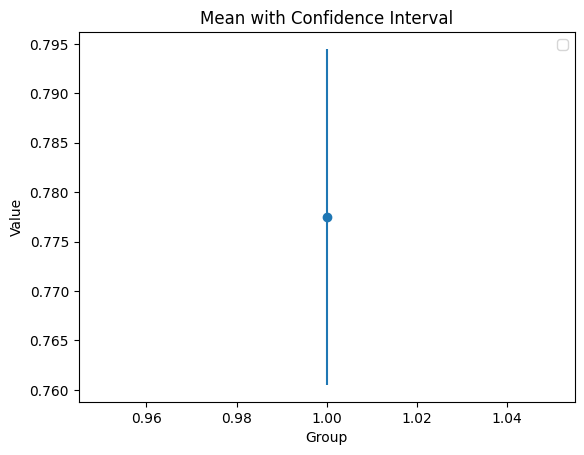

--------------------------------------


In [11]:
y_prob_svm_20_age, y_test_svm_20_age, svm = ML_algorithms.model_svm(df_mean_age, df_clean)
mean_accuracy_svm_20_age, confidence_interval_svm_20_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_clean.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 10)

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

Outliers found:


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1434
           1       0.86      0.81      0.83      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Node Labels:
 Annotation(0.528188, 0.954545, 'avg_glucose_level <= 161.87\nsamples = 6554\nvalue = [3291.0, 3263.0]\nclass = 0')


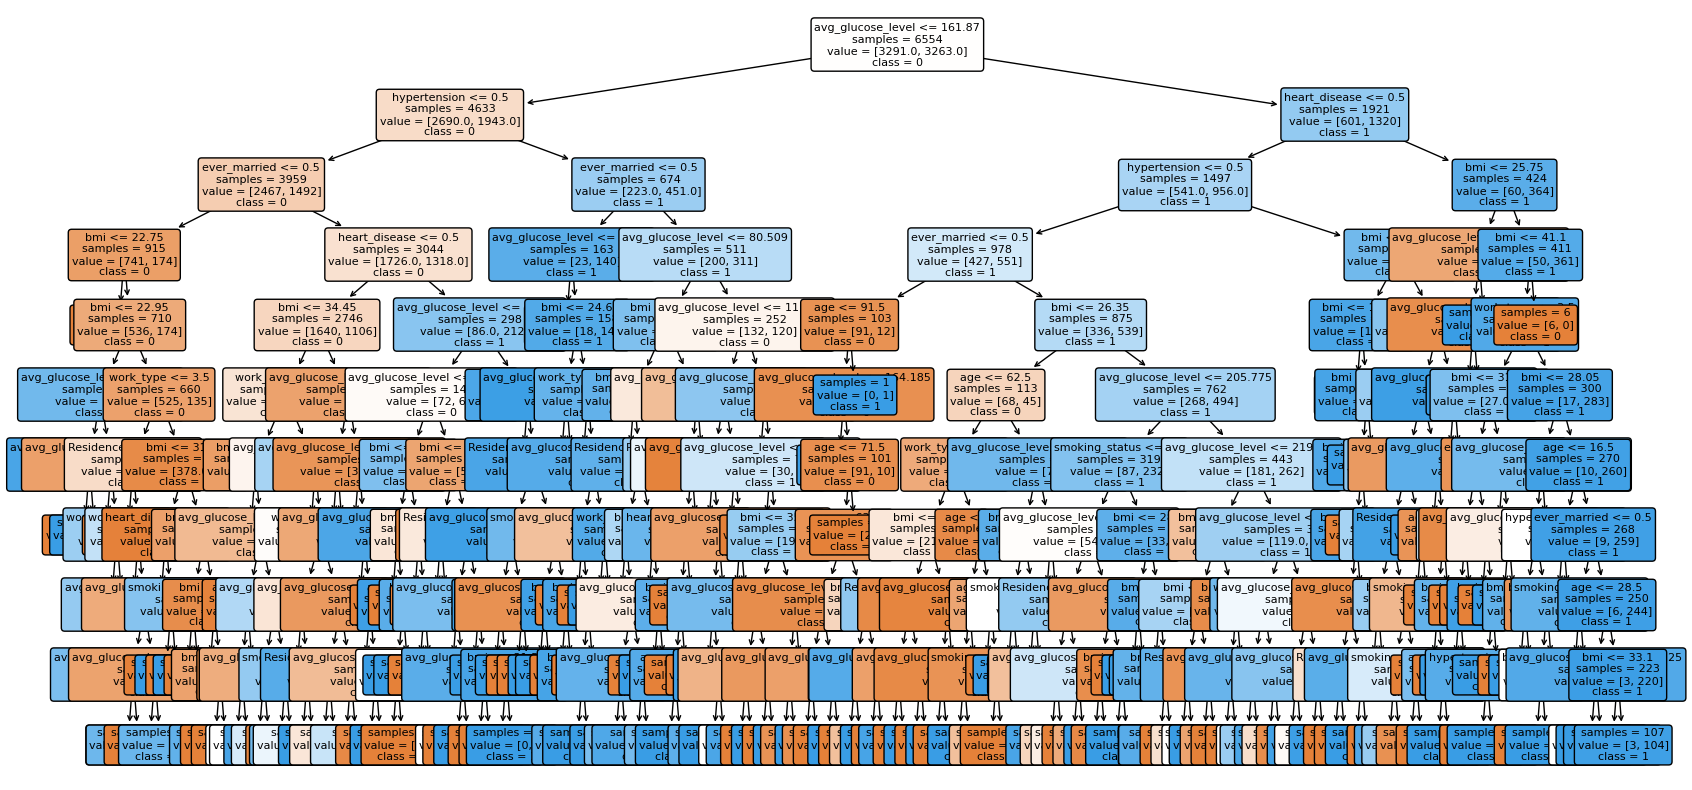

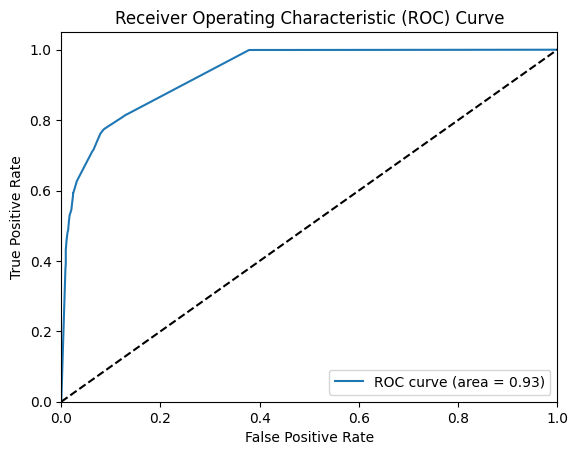

AUC Score: 0.9339743882338024


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.797153024911032, 0.8327402135231317, 0.8078291814946619, 0.7758007117437722, 0.8220640569395018, 0.800711743772242, 0.8576512455516014, 0.7900355871886121, 0.8398576512455516, 0.9035714285714286]
Mean accuracy: 0.8227414844941535
95% confidence interval: (0.7957835734523221, 0.849699395535985)


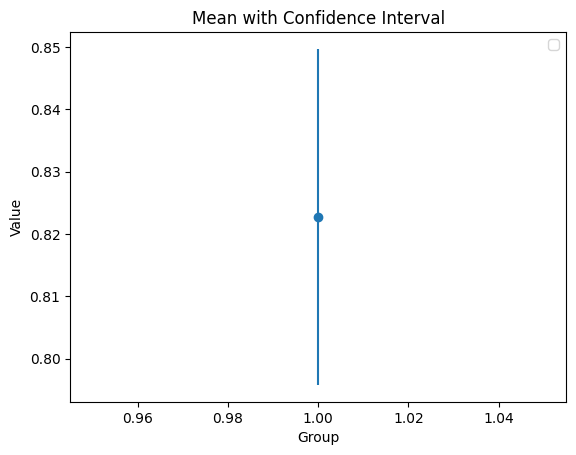

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_glucose, df_clean)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)


**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1434
           1       0.87      0.94      0.90      1375

    accuracy                           0.90      2809
   macro avg       0.90      0.90      0.90      2809
weighted avg       0.90      0.90      0.90      2809



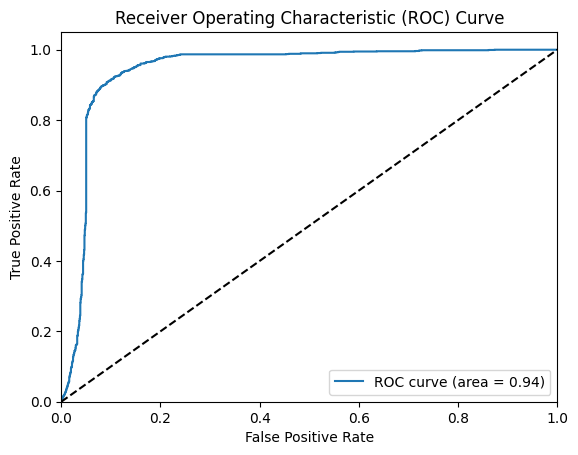

AUC Score: 0.9413799923925447


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7864768683274022, 0.797153024911032, 0.7544483985765125, 0.8220640569395018, 0.7402135231316725, 0.8042704626334519, 0.7686832740213523, 0.7437722419928826, 0.7758007117437722, 0.7464285714285714]
Mean accuracy: 0.773931113370615
95% confidence interval: (0.7537718867970533, 0.7940903399441768)


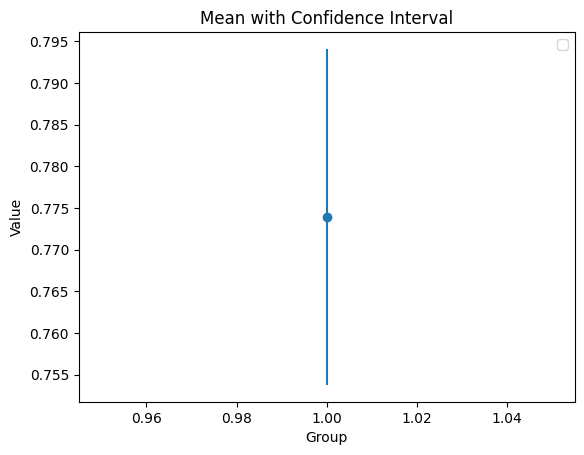

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_glucose, df_clean)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_glucose, 'avg_glucose_level')

Outliers found:


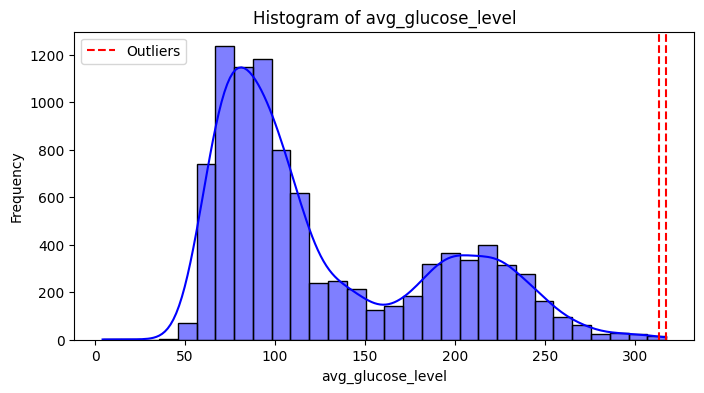

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1434
           1       0.86      0.81      0.83      1375

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Node Labels:
 Annotation(0.528935, 0.954545, 'avg_glucose_level <= 161.87\nsamples = 6554\nvalue = [3291.0, 3263.0]\nclass = 0')


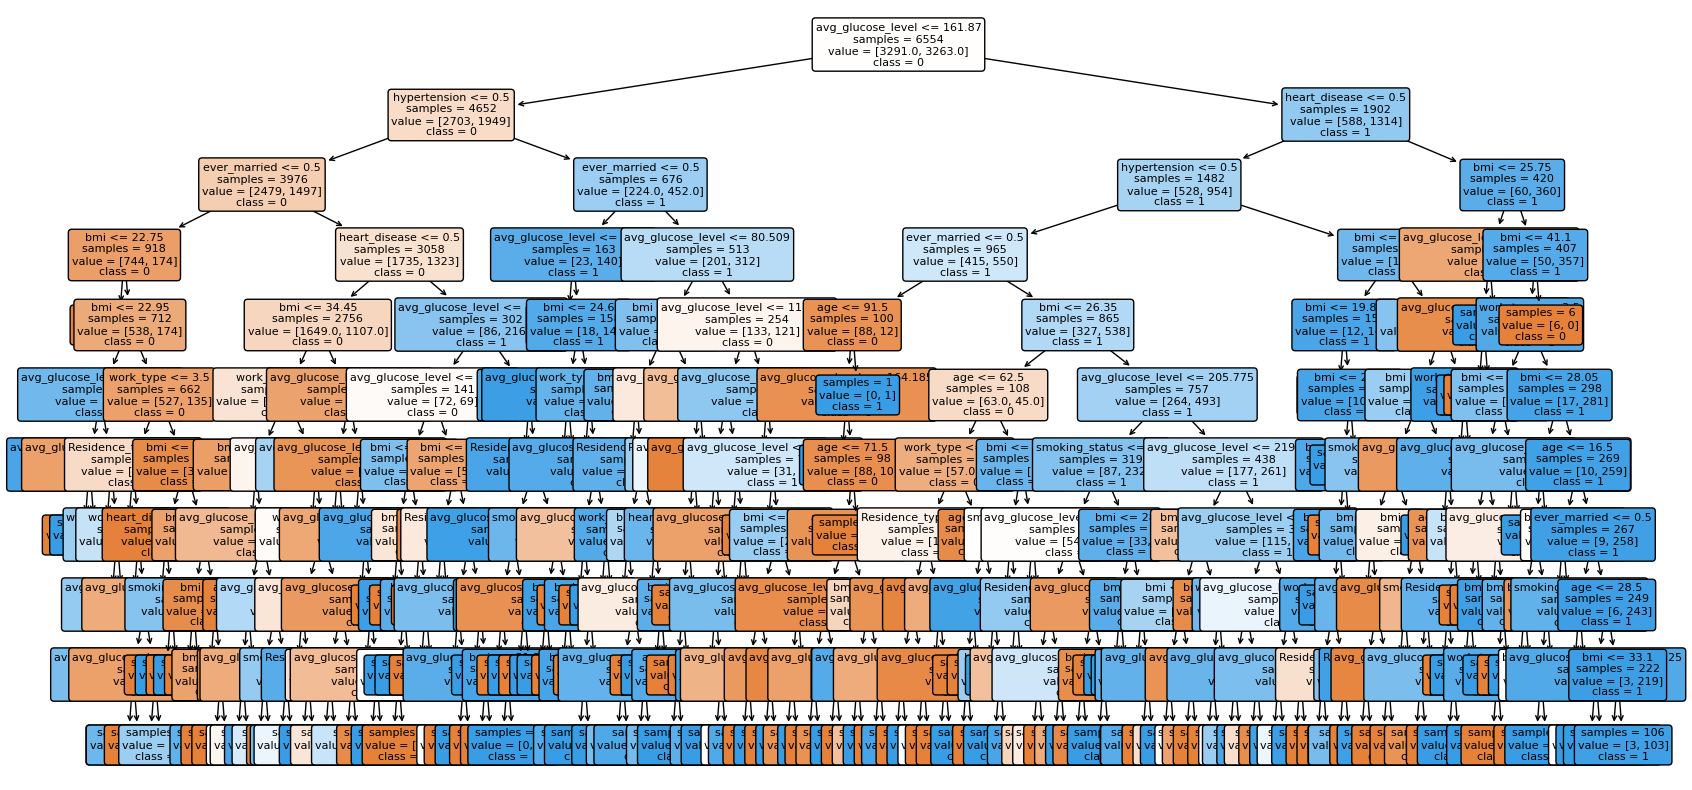

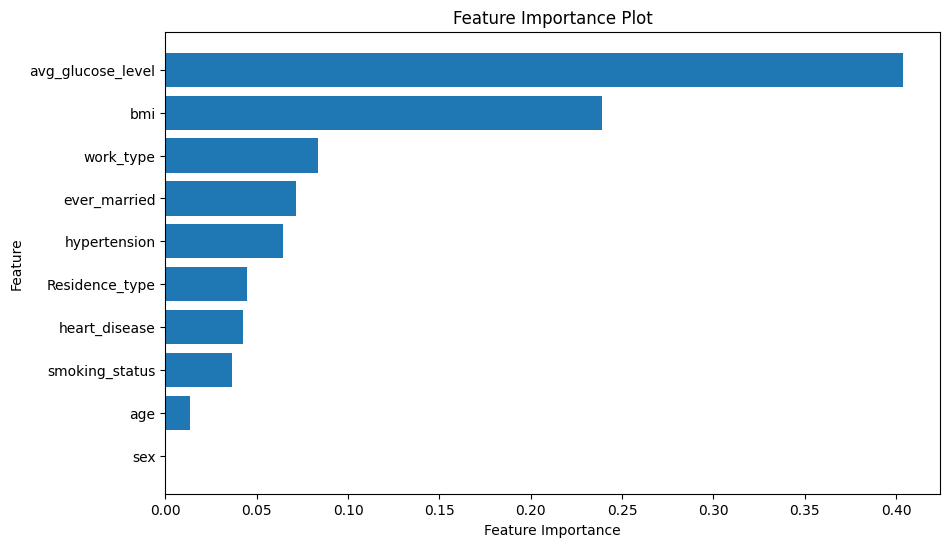

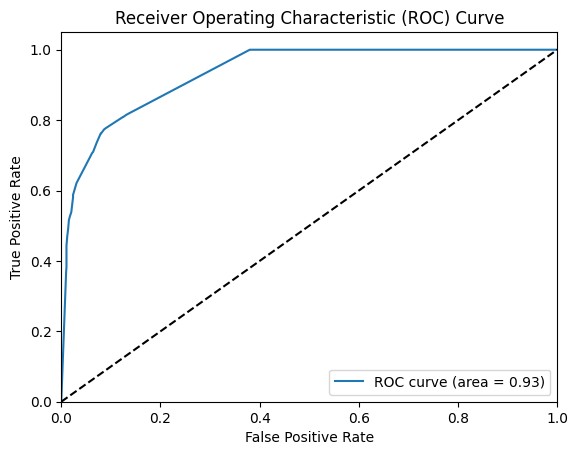

AUC Score: 0.9334621529098516


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8469750889679716, 0.7544483985765125, 0.7864768683274022, 0.8362989323843416, 0.8113879003558719, 0.8149466192170819, 0.8398576512455516, 0.8042704626334519, 0.7829181494661922, 0.8642857142857143]
Mean accuracy: 0.8141865785460091
95% confidence interval: (0.7901585570025883, 0.8382146000894298)


In [20]:
y_prob_dt_20_glucose, y_test_dt_20_glucose, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_clean)
mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1434
           1       0.87      0.94      0.90      1375

    accuracy                           0.90      2809
   macro avg       0.90      0.90      0.90      2809
weighted avg       0.91      0.90      0.90      2809



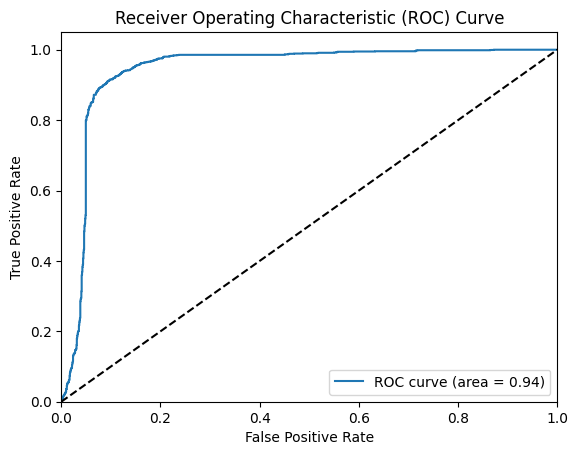

AUC Score: 0.9415975656143021


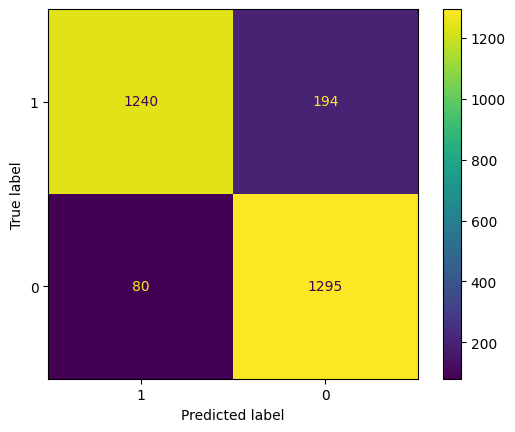

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8185053380782918, 0.7615658362989324, 0.7793594306049823, 0.7473309608540926, 0.7829181494661922, 0.7473309608540926, 0.7935943060498221, 0.797153024911032, 0.7473309608540926, 0.7464285714285714]
Mean accuracy: 0.7721517539400103
95% confidence interval: (0.7536454489551495, 0.7906580589248712)


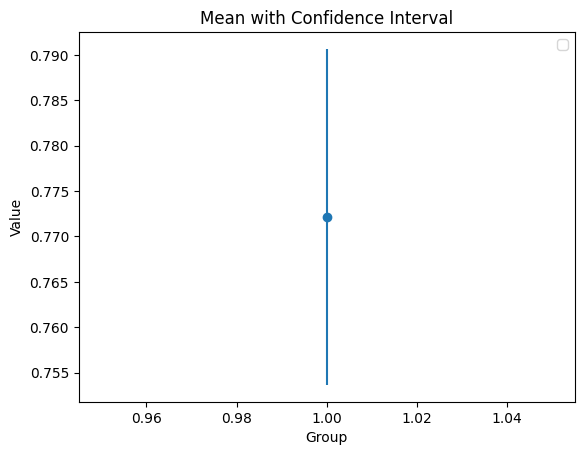

--------------------------------------


In [21]:
y_prob_svm_20_glucose, y_test_svm_20_glucose, svm = ML_algorithms.model_svm(df_mean_glucose, df_clean)
mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## bmi

In [22]:
df = df_clean.copy()

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

--------------------------------------
no outliers detected


In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 10)

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

Outliers found:


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1434
           1       0.86      0.78      0.82      1375

    accuracy                           0.83      2809
   macro avg       0.84      0.83      0.83      2809
weighted avg       0.83      0.83      0.83      2809

Node Labels:
 Annotation(0.625096, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6554\nvalue = [3295.0, 3259.0]\nclass = 0')


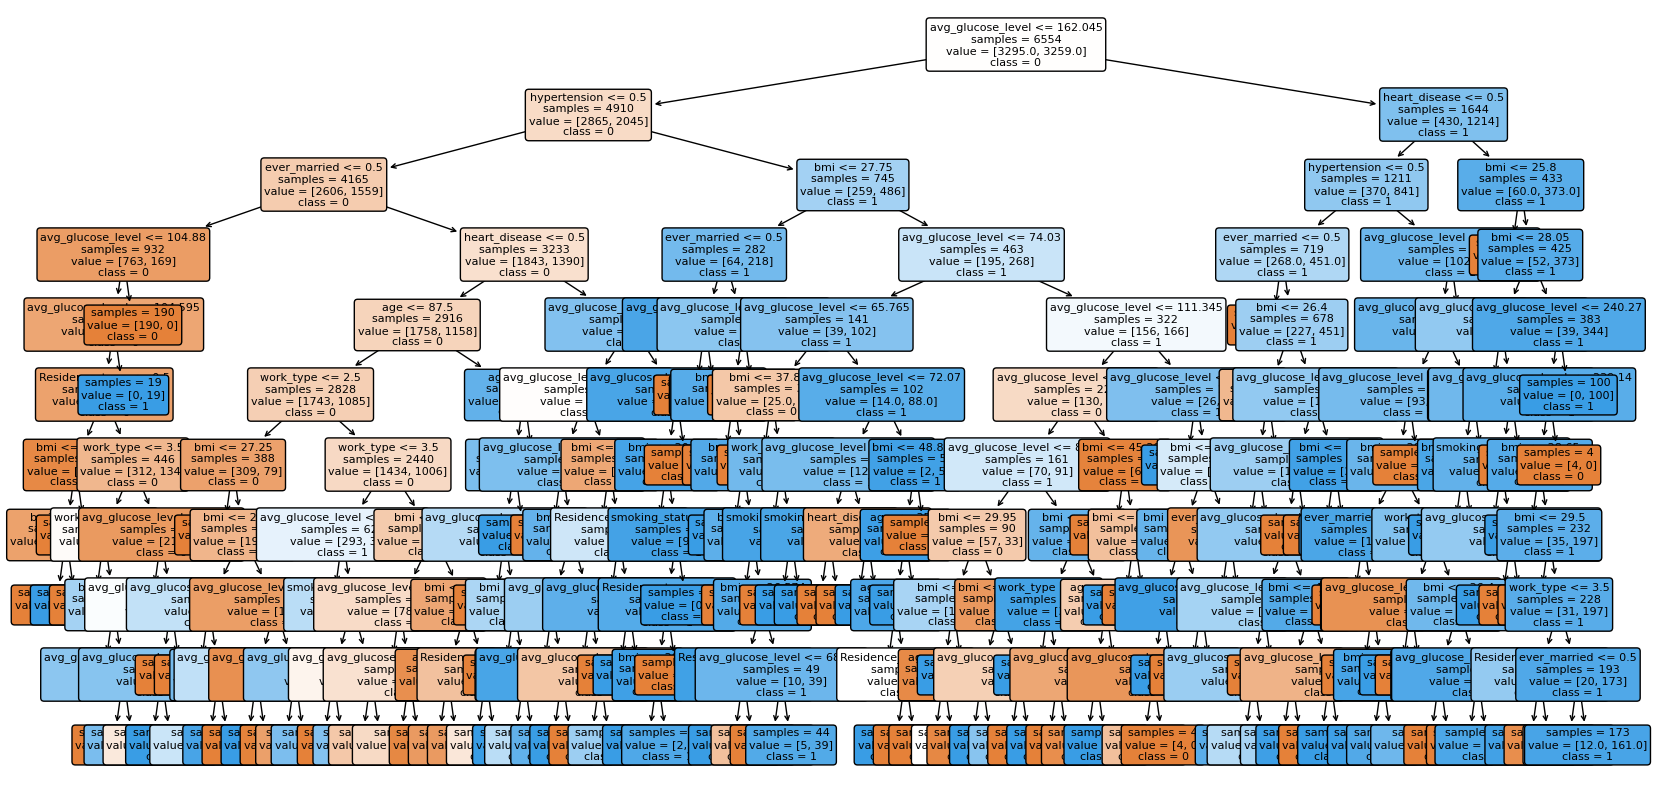

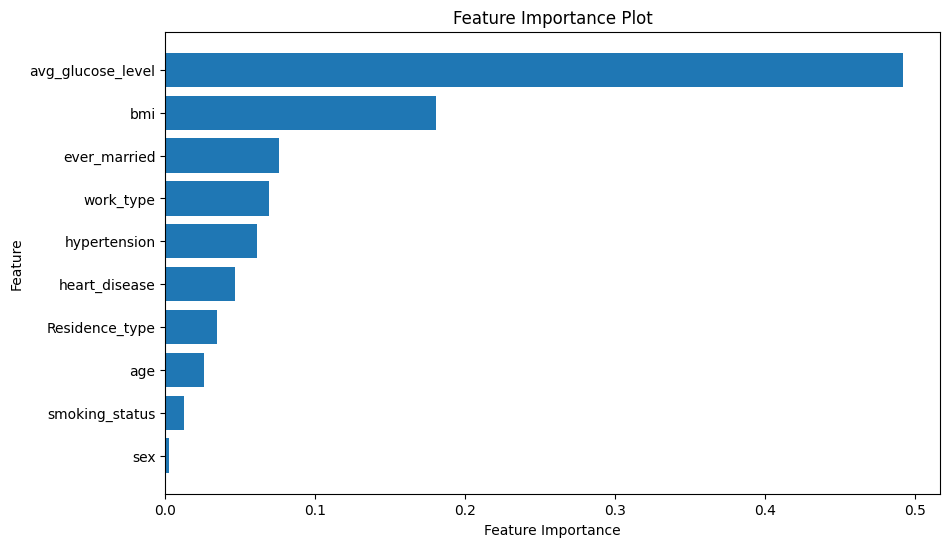

AUC Score: 0.9239804741980475


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8256227758007118, 0.8149466192170819, 0.8362989323843416, 0.8113879003558719, 0.8185053380782918, 0.8327402135231317, 0.8113879003558719, 0.8398576512455516, 0.8256227758007118, 0.7964285714285714]
Mean accuracy: 0.8212798678190136
95% confidence interval: (0.8117391990539005, 0.8308205365841268)


In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_bmi, df_clean)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_bmi, df_clean)
mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1434
           1       0.87      0.90      0.88      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809



AUC Score: 0.9432696842906048


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7330960854092526, 0.7615658362989324, 0.7224199288256228, 0.7615658362989324, 0.7651245551601423, 0.8113879003558719, 0.7686832740213523, 0.7651245551601423, 0.7829181494661922, 0.7892857142857143]
Mean accuracy: 0.7661171835282156
95% confidence interval: (0.747772902051498, 0.7844614650049331)


### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_bmi, 'bmi')

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

Outliers found:


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1434
           1       0.86      0.78      0.82      1375

    accuracy                           0.83      2809
   macro avg       0.84      0.83      0.83      2809
weighted avg       0.84      0.83      0.83      2809

Node Labels:
 Annotation(0.625096, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6554\nvalue = [3295.0, 3259.0]\nclass = 0')


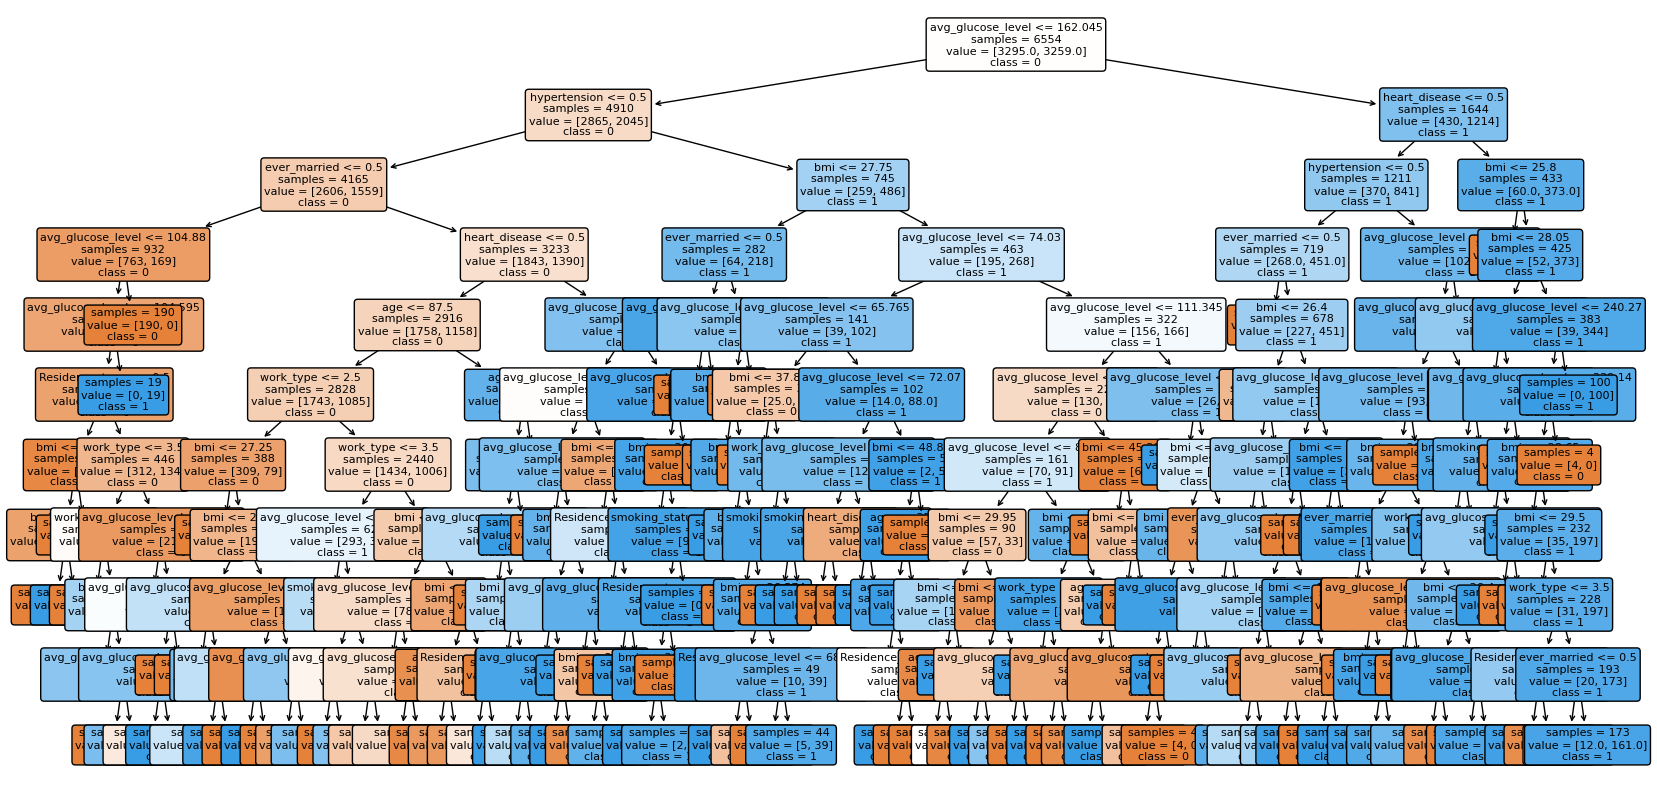

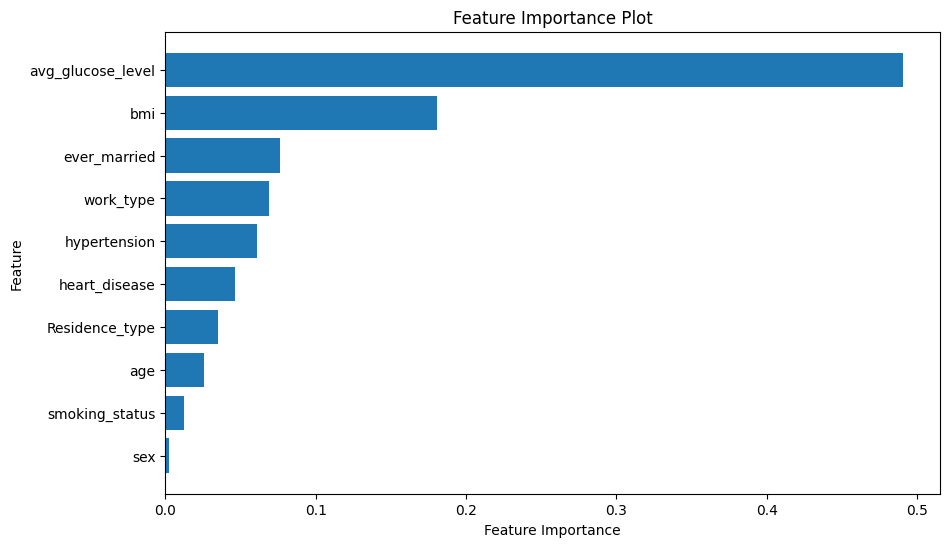

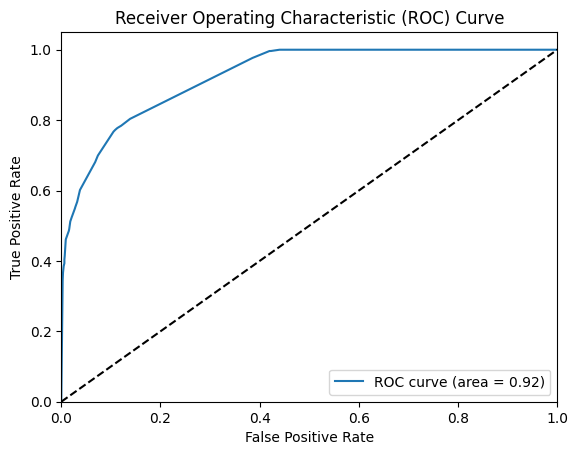

AUC Score: 0.9246134144795233


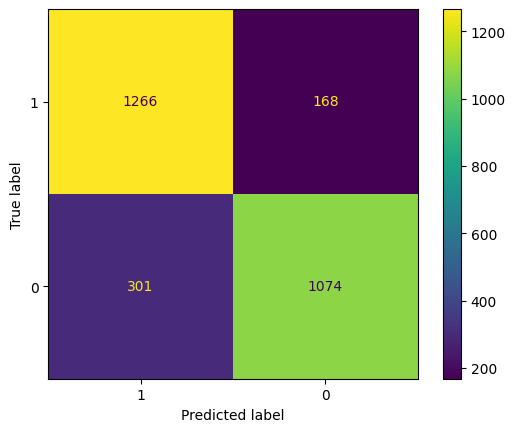

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.8647686832740213, 0.8185053380782918, 0.8149466192170819, 0.8149466192170819, 0.8362989323843416, 0.8220640569395018, 0.8185053380782918, 0.8505338078291815, 0.7714285714285715]
Mean accuracy: 0.8212709710218608
95% confidence interval: (0.8028358595688452, 0.8397060824748763)


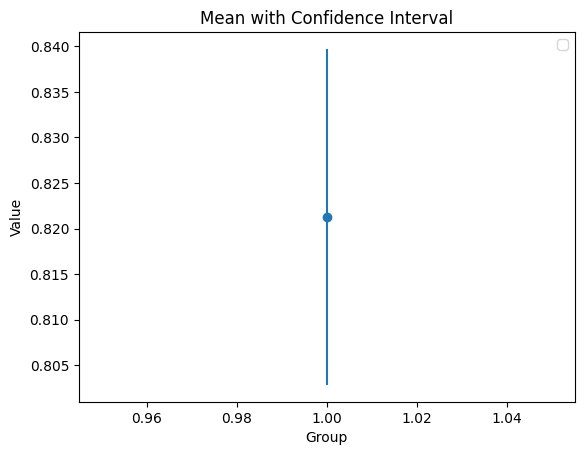

In [30]:
y_prob_dt_20_bmi, y_test_dt_20_bmi, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_clean)
mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1434
           1       0.87      0.90      0.89      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809



AUC Score: 0.9440862178268036


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7864768683274022, 0.7544483985765125, 0.7793594306049823, 0.7935943060498221, 0.7935943060498221, 0.7793594306049823, 0.800711743772242, 0.7900355871886121, 0.800711743772242, 0.7714285714285715]
Mean accuracy: 0.784972038637519
95% confidence interval: (0.7747152948065588, 0.7952287824684792)


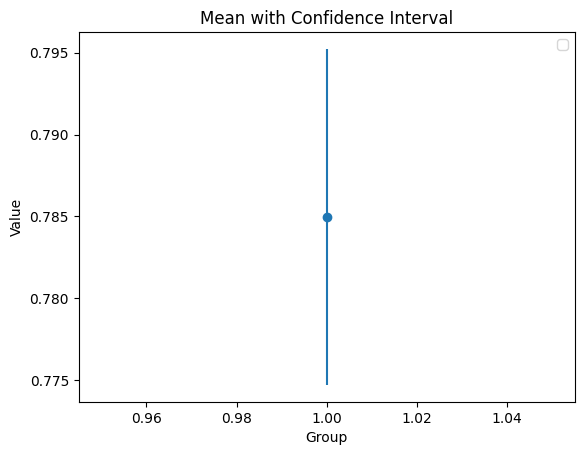

--------------------------------------


In [31]:
y_prob_svm_20_bmi, y_test_svm_20_bmi, svm = ML_algorithms.model_svm(df_mean_bmi, df_clean)
mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## Categorical

In [32]:
df = df_clean.copy()

In [33]:
outliers_utils.visualize_outliers_categorical(df, 'work_type')

Value counts:
work_type
4    5833
3    2123
2    1265
1     122
0      20
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 10, df)

Least frequent value:  0


Value counts:
work_type
4    5250
3    1909
2    1137
0     953
1     114
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 0, 1]
Outliers found:


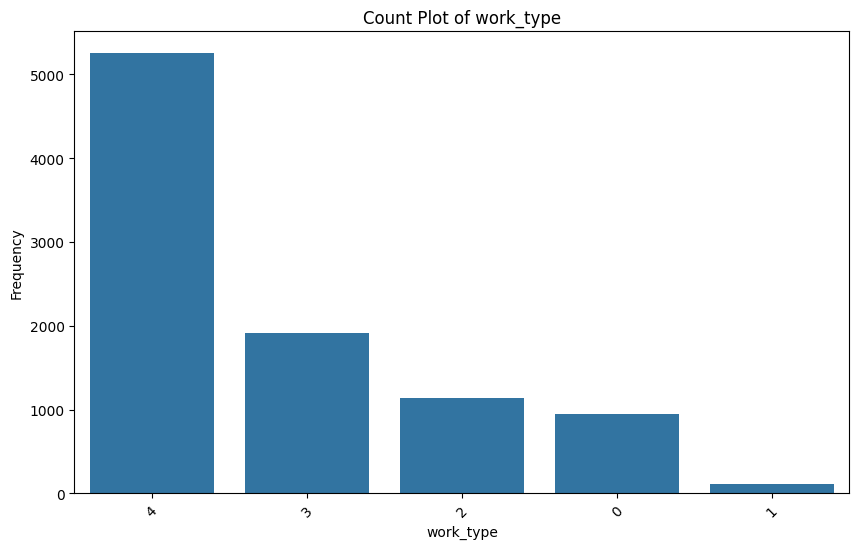

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1434
           1       0.76      0.94      0.84      1375

    accuracy                           0.82      2809
   macro avg       0.84      0.83      0.82      2809
weighted avg       0.85      0.82      0.82      2809

Node Labels:
 Annotation(0.640021, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


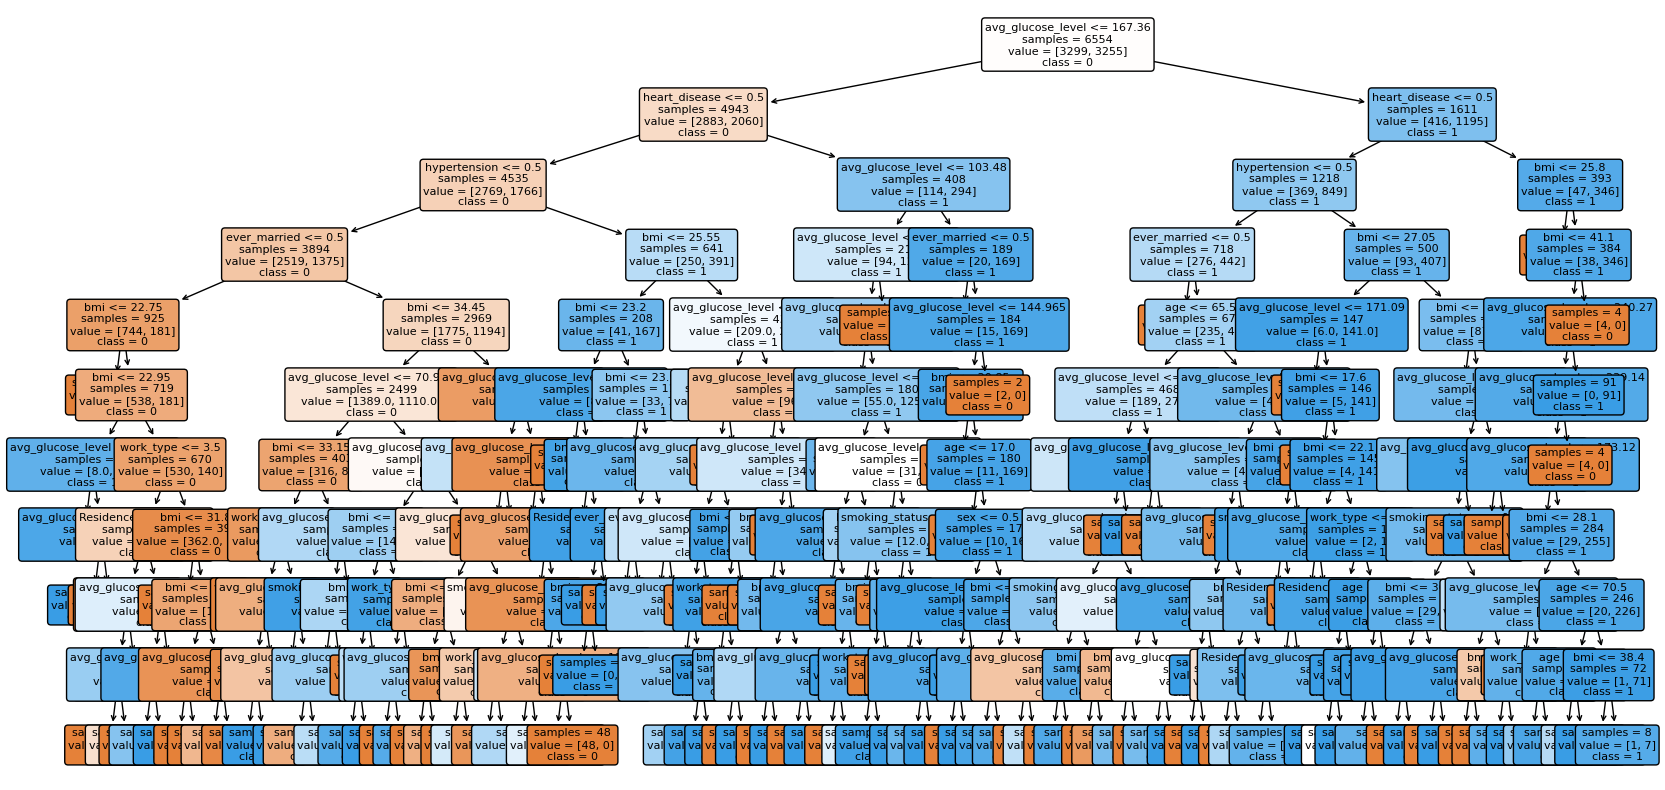

AUC Score: 0.9126727526309116


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7722419928825622, 0.8398576512455516, 0.8861209964412812, 0.7935943060498221, 0.8185053380782918, 0.8113879003558719, 0.8505338078291815, 0.8291814946619217, 0.8220640569395018, 0.875]
Mean accuracy: 0.8298487544483987
95% confidence interval: (0.8049573759103116, 0.8547401329864858)


In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, decision_tree = ML_algorithms.model_dt(df_categorical, df_clean)
mean_accuracy_dt_categorical, confidence_interval_dt_categorical = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1434
           1       0.79      0.88      0.83      1375

    accuracy                           0.82      2809
   macro avg       0.83      0.82      0.82      2809
weighted avg       0.83      0.82      0.82      2809



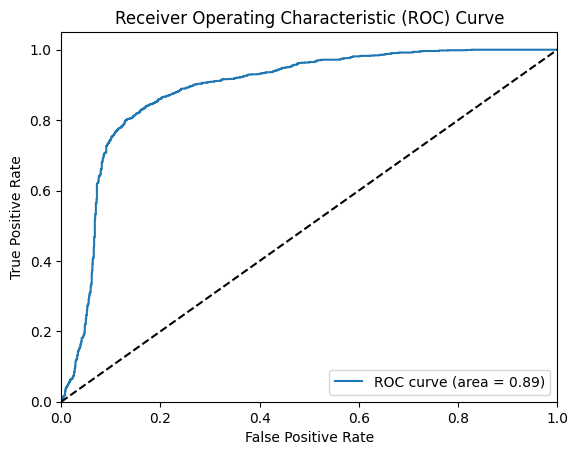

AUC Score: 0.8850772156713579


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8291814946619217, 0.7117437722419929, 0.7473309608540926, 0.7758007117437722, 0.7935943060498221, 0.7615658362989324, 0.7686832740213523, 0.7758007117437722, 0.7935943060498221, 0.775]
Mean accuracy: 0.7732295373665481
95% confidence interval: (0.7511364824092635, 0.7953225923238327)


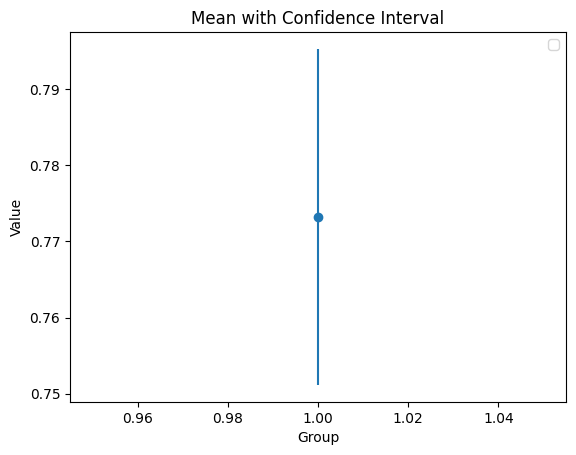

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, svm = ML_algorithms.model_svm(df_categorical, df_clean)
mean_accuracy_svm_categorical, confidence_interval_svm_categorical = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

print('--------------------------------------')

## Conclusion

### ROC Curve

**Decision Tree**

Decision Tree


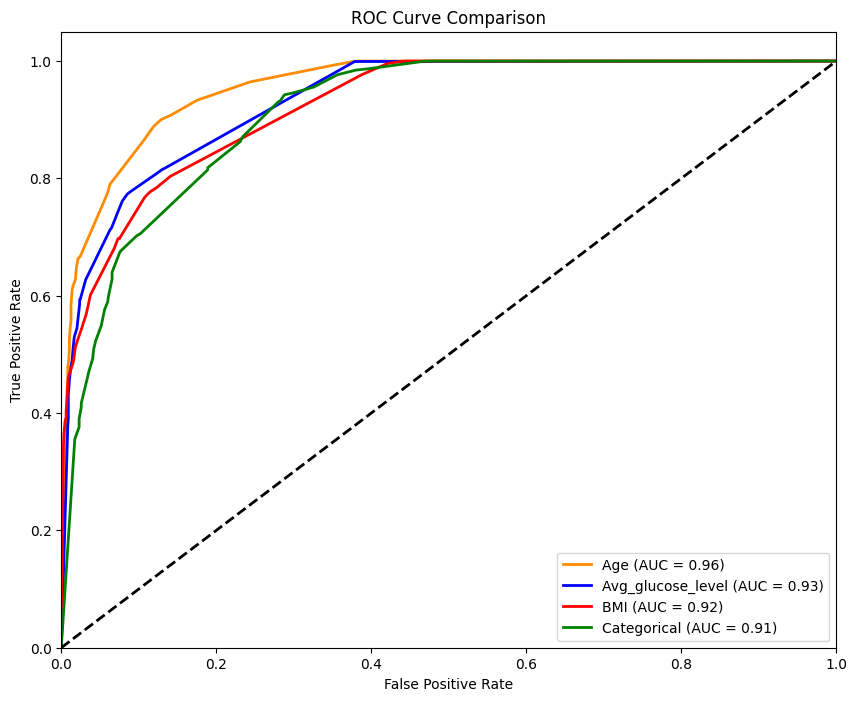

In [38]:
roc_results = [
    (y_pred_prob_age_dt, y_test_age_dt, 'Age'),
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_categorical_dt, y_test_categorical_dt, 'Categorical')
]

print('Decision Tree')
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Decision Tree - substitution of outliers**

In [39]:
roc_results = [
    (y_prob_dt_20_age, y_test_dt_20_age, 'Age'),
    (y_prob_dt_20_glucose, y_test_dt_20_glucose, 'Avg_glucose_level'),
    (y_prob_dt_20_bmi, y_test_dt_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine**

In [40]:
roc_results = [
    (y_pred_prob_age_svm, y_test_age_svm, 'Age'),
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_categorical_svm, y_test_categorical_svm, 'Categorical')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine - substitution of outliers**

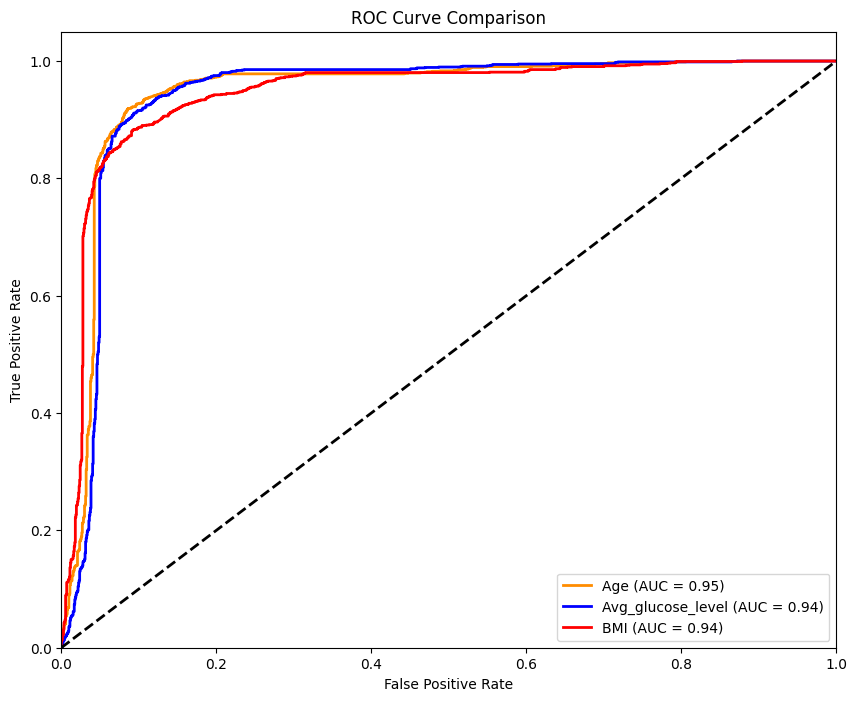

In [41]:
roc_results = [
    (y_prob_svm_20_age, y_test_svm_20_age, 'Age'),
    (y_prob_svm_20_glucose, y_test_svm_20_glucose, 'Avg_glucose_level'),
    (y_prob_svm_20_bmi, y_test_svm_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval 

**Decision Tree**

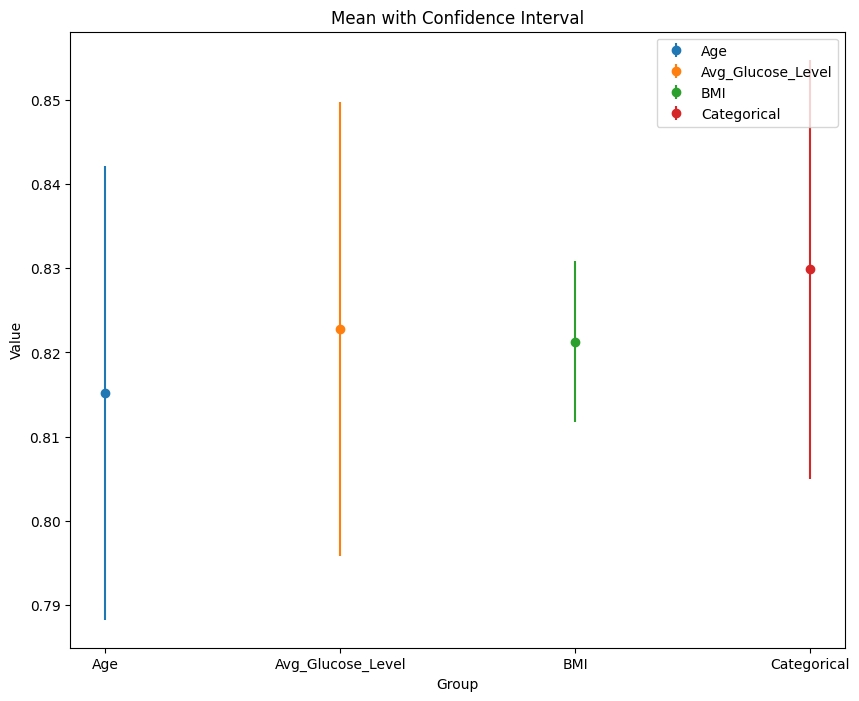

In [42]:
model_results = [
    ('Age', mean_accuracy_dt_age, confidence_interval_dt_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('Categorical', mean_accuracy_dt_categorical, confidence_interval_dt_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Decision Tree - substitution of outliers**

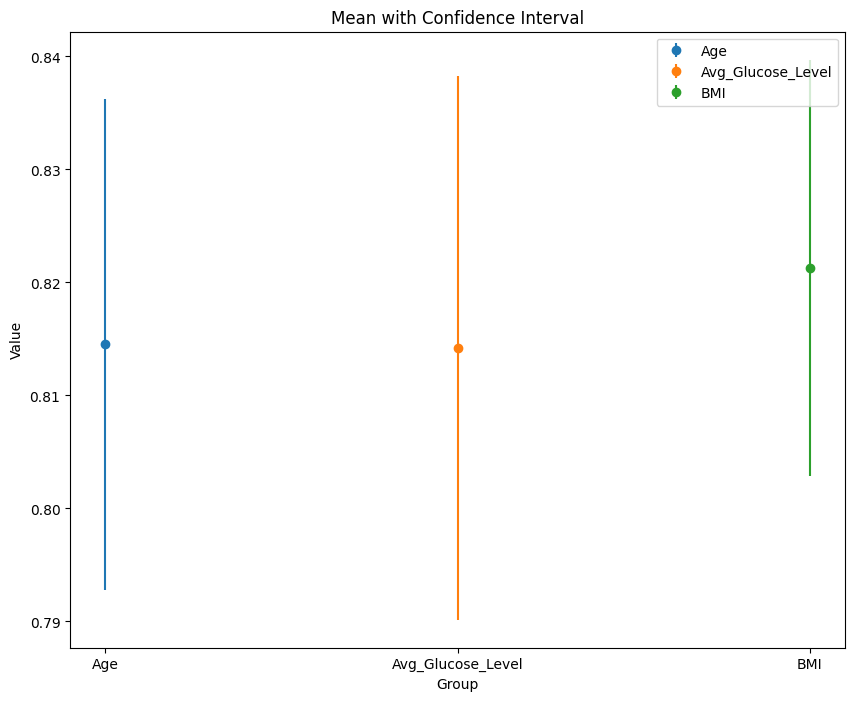

In [43]:
model_results = [
    ('Age', mean_accuracy_dt_20_age, confidence_interval_dt_20_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose),
    ('BMI', mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine**

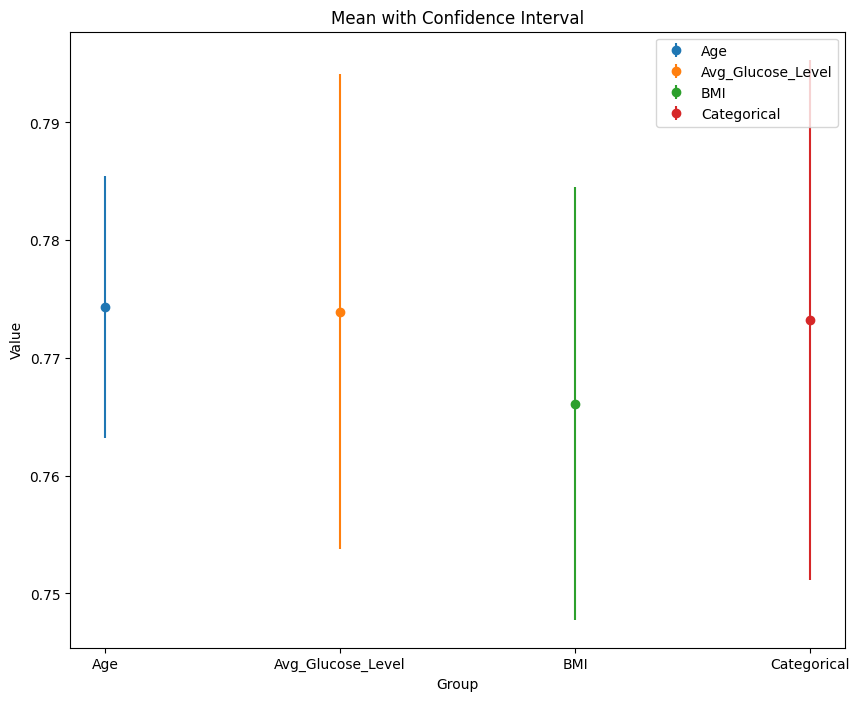

In [44]:
model_results = [
    ('Age', mean_accuracy_svm_age, confidence_interval_svm_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_glucose, confidence_interval_svm_glucose),
    ('BMI', mean_accuracy_svm_bmi, confidence_interval_svm_bmi),
    ('Categorical', mean_accuracy_svm_categorical, confidence_interval_svm_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine - substitution of outliers**

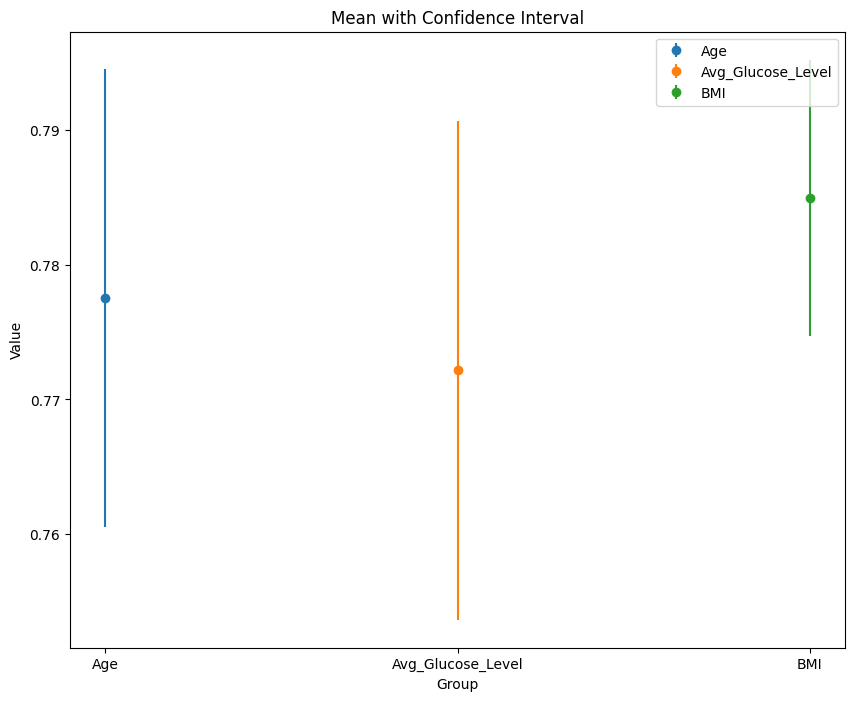

In [45]:
model_results = [
    ('Age', mean_accuracy_svm_20_age, confidence_interval_svm_20_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose),
    ('BMI', mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)